# **Introduction**
A short notebook demonstrating how to create augmented supernova light curves for the SPCC dataset. This assumes that there is already a created selection of SPCC objects as an original training sample and we would like to augment this sample. The directories for the SPCC data (the folder `SIMGEN_PUBLIC_DES`) in `spcc.py`, the file with list of objects to augment and output folder need to be specified.

In [1]:
import spcc
import augment
import subprocess
import matplotlib.pyplot as plt

In [2]:
#--- load spcc data and create augmentor
sn_data = spcc.SPCC_SN_data()
spcc_augmentor = spcc.SpccAugmentor()

In [3]:
#--- get list of objects to augment
#--- this is read from a file listing the supernovae by line
#--- if we have already augmented a sample and want to augment additional
# fainter supernovae, use the additional keywords that are currently commented out.
# this will augment only the listed objects that are not in the original training list

#training_objects = sn_data.get_augmentation_list(training_list='../../wavelets/paper_outputs/mag_lim/mag_lim_run_1/training_mag_lim.LIST')#, add_faint=True, training_faint_list='../../wavelets/paper_outputs/mag_lim_faint/mag_lim_faint_run_1/training_mag_lim_faint.LIST')
training_objects = sn_data.get_augmentation_list(training_list='/dir/to/file/training.LIST')#, add_faint=True, training_faint_list='/dir/to/file/mag_lim_faint_run_1/training_mag_lim_faint.LIST')

In [4]:
#--- create directory for saving augmented objects in
save_augmented_objects = True
if save_augmented_objects:
    augment_dir = 'augmented_spcc_sample'
    subprocess.call(['mkdir', augment_dir])

In [5]:
#--- specifiy number of augmented light curves to aim for per original SPCC supernova
num_augments = 1

*** DES_SN001186.DAT ***


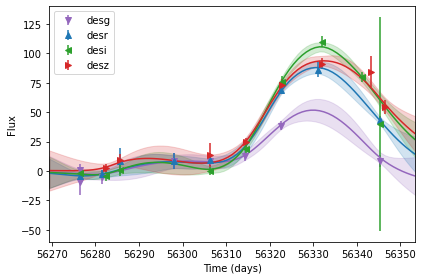

*** DES_SN002739.DAT ***


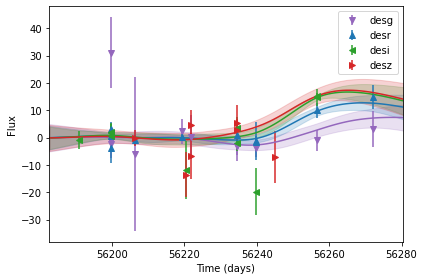

*** DES_SN005520.DAT ***


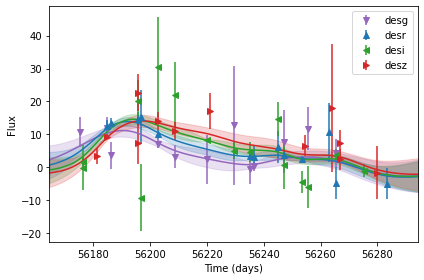

*** DES_SN011001.DAT ***


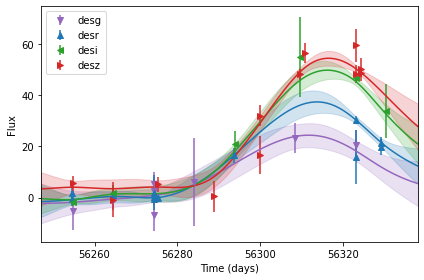

*** DES_SN013866.DAT ***


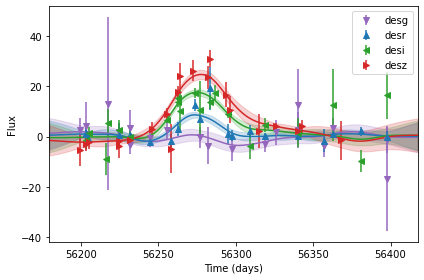

In [6]:
#--- go through training objects to create augmented light curves
#--- can use prints if want more clarity in process
#--- also, if required, is the avocado plot method to visualise light curves
for sn in training_objects[:5]:
    print('***',sn,'***')
    reference_object = sn_data.load_reference_object(sn)
    gp, gp_observations, gp_fit_parameters = reference_object.fit_gaussian_process()
    
    augmented_object = spcc_augmentor.augment_object(reference_object, force_success=True)
    
    for i in range(num_augments):
        augmented_object = spcc_augmentor.augment_object(reference_object, force_success=True)
        
        if sn_data.passed_criteria(augmented_object):
            #print('Augmented object passed citeria')
            if save_augmented_objects:
                #print('Saving augmented object')
                sn_data.save_augmented_object(augmented_object, augment_dir)
            augmented_object.plot_light_curve()
            plt.show()
            
        else:
            #print('Augmented object did not pass criteria. Going to next augmentation')
            continue